## Week 2 - Topic modeling using SVD and NMF

In [ ]:
# Topic modeling using SVD decomposition

In [5]:
#imports

In [6]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt


In [7]:
%matplotlib inline
# very small numbers diplayed in scientific format
np.set_printoptions(suppress=False)

In [8]:
# Data will be donwload
# first we have to specify which categories to download and what to remove from documents
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers','footers','quotes')
# fetch_20newsgroups is dataset from scikitlearn
newsgroups_train = fetch_20newsgroups(subset='train', categories = categories, remove = remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories = categories, remove = remove)



In [9]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [10]:
print("\n".join(newsgroups_train.data[:2]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


In [11]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [12]:
num_topics, num_top_words = 6,8

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
# vectorizer.fit_transform will learn (recognize) and save all the words form all the documents (posts)
# and make matrix form it  [post-rows, words-columns]
# matrix is called vectors
vectorizer = CountVectorizer(stop_words = 'english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# from a "list" of 2034 posts we have got 21240 words by using CountVectorizer function
print(len(newsgroups_train.data), vectors.shape)


2034 (2034, 26576)


In [16]:
# get_feature_names() is the vocabulary learnd ordered alphabetically
vocab = np.array(vectorizer.get_feature_names())

In [17]:
vocab.shape

(26576,)

In [18]:
vocab[10000:10005]

array(['factors', 'factory', 'facts', 'factsnet', 'factual'], dtype='<U80')

In [19]:
# decomposing a post/words matrix using SVD

In [20]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 30.3 s, sys: 1.33 s, total: 31.6 s
Wall time: 18.1 s


In [21]:
# dim
print(U.shape, s.shape, Vh.shape)
# original matrix is invertible - s is full rank matrix in this case

(2034, 2034) (2034,) (2034, 26576)


In [22]:
# multiply matricies to confirm that the the decomposition reconstructs the matrix

In [23]:
reconstructed_vectors = U @ np.diag(s) @ Vh
np.linalg.norm(reconstructed_vectors - vectors)

2.9488546705018146e-12

In [24]:
# confirm that Vh and U are orthonormal
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))
np.allclose(U @ U.T, np.eye(U.shape[0]))

True

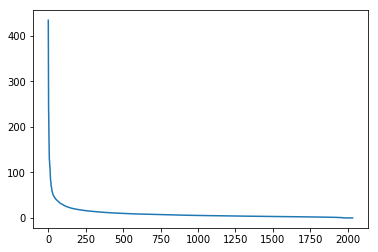

In [25]:
# plot of singular values
plt.plot(s);

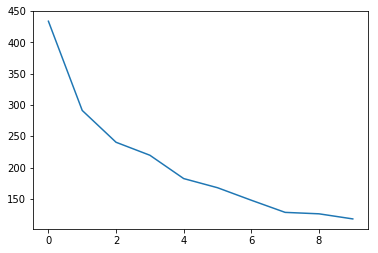

In [26]:
plt.plot(s[:10]);

In [27]:
s

array([4.33926985e+02, 2.91510127e+02, 2.40711377e+02, ...,
       1.68683622e-15, 1.41196638e-15, 1.27172738e-15])

In [28]:
num_top_words = 3

In [29]:
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:1]]
    topic_words = ([top_words(t) for t in a])
    return ['  '.join(t) for t in topic_words]

In [30]:
num_top_words=10

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return ['  '.join(t) for t in topic_words]

In [31]:
show_topics(Vh[:5])

['ditto  critus  propagandist  surname  galacticentric  kindergarten  surreal  imaginative  salvadorans  autotheism',
 'jpeg  gif  file  color  quality  image  jfif  format  bit  version',
 'graphics  edu  pub  mail  128  3d  ray  ftp  send  image',
 'jesus  god  matthew  people  atheists  atheism  does  graphics  religious  said',
 'image  data  processing  analysis  software  available  tools  display  tool  user']

In [32]:
## below I tried to find the maximum value of the 0th row of Vh matrix it coresponds to a word ditto, the same result as above

In [33]:
Vh[0,:]

array([-9.40971949e-03, -1.14531979e-02, -2.16949925e-05, ...,
       -5.71798766e-06, -1.14359753e-05, -1.09243411e-03])

In [34]:
vocab

array(['00', '000', '0000', ..., 'zware', 'zwarte', 'zyxel'], dtype='<U80')

In [35]:
np.where(Vh[0,:] == np.max(Vh[0,:]))

(array([8462]),)

In [36]:
vocab[8462]

'ditto'

In [37]:
# NMF - non negative matrix factorization
# different matrix factorization 
# only approximate factorization
# there are various different implementations of NMF

Rather than constraining our factors to be *orthogonal*, another idea would to constrain them to be *non-negative*. NMF is a factorization of a non-negative data set $V$: $$ V = W H$$ into non-negative matrices $W,\; H$. Often positive factors will be **more easily interpretable** (and this is the reason behind NMF's popularity). 

<img src="images/face_nmf.png" alt="NMF on faces" style="width: 80%"/>

(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

Nonnegative matrix factorization (NMF) is a non-exact factorization that factors into one skinny positive matrix and one short positive matrix.  NMF is NP-hard and non-unique.  There are a number of variations on it, created by adding different constraints. 

### sources for more information on NMF
- [Face Decompositions](http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py)
- [Collaborative Filtering, eg movie recommendations](http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/)
- [Audio source separation](https://pdfs.semanticscholar.org/cc88/0b24791349df39c5d9b8c352911a0417df34.pdf)
- [Chemistry](http://ieeexplore.ieee.org/document/1532909/)
- [Bioinformatics](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-015-0485-4) and [Gene Expression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2623306/)
- Topic Modeling (our problem!)
<img src="images/nmf_doc.png" alt="NMF on documents" style="width: 80%"/>

(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))
- [The Why and How of Nonnegative Matrix Factorization](https://arxiv.org/pdf/1401.5226.pdf)


- NMF form sklearn
[scikit-learn's implementation of NMF](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html):


In [41]:
# scikit learn implementation of NMF
m,n = vectors.shape
d = 5 #number of topics

In [43]:
clf = decomposition.NMF(n_components=d, random_state =1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [46]:
show_topics(H1)

['jpeg  image  gif  file  color  images  format  quality  version  files',
 'edu  graphics  pub  mail  128  ray  ftp  send  3d  com',
 'space  launch  satellite  nasa  commercial  satellites  year  market  data  earth',
 'jesus  god  people  matthew  atheists  does  atheism  said  just  believe',
 'image  data  available  software  processing  ftp  edu  analysis  images  display']

In [47]:
# NMF implementatino from cratch using numpy and SGD

#### Gradient Descent

The key idea of standard **gradient descent**:
1. Randomly choose some weights to start
2. Loop:
    - Use weights to calculate a prediction
    - Calculate the derivative of the loss
    - Update the weights
3. Repeat step 2 lots of times.  Eventually we end up with some decent weights.

**Key**: We want to decrease our loss and the derivative tells us the direction of **steepest descent**.  

Note that *loss*, *error*, and *cost* are all terms used to describe the same thing.

Let's take a look at the [Gradient Descent Intro notebook](gradient-descent-intro.ipynb) (originally from the [fast.ai deep learning course](https://github.com/fastai/courses)).

**Stochastic gradient descent** is an incredibly useful optimization method (it is also the heart of deep learning, where it is used for backpropagation).

For *standard* gradient descent, we evaluate the loss using **all** of our data which can be really slow.  In *stochastic* gradient descent, we evaluate our loss function on just a sample of our data (sometimes called a *mini-batch*).  We would get different loss values on different samples of the data, so this is *why it is stochastic*.  It turns out that this is still an effective way to optimize, and it's much more efficient!

We can see how this works in this [excel spreadsheet](graddesc.xlsm) (originally from the [fast.ai deep learning course](https://github.com/fastai/courses)).

**Goal**: Decompose $V\;(m \times n)$ into $$V \approx WH$$ where $W\;(m \times d)$ and $H\;(d \times n)$, $W,\;H\;>=\;0$, and we've minimized the Frobenius norm of $V-WH$.

**Approach**: We will pick random positive $W$ & $H$, and then use SGD to optimize.

In [53]:
# first we have to do topic frequency - inverse document frequency (TF-IDF) 
# form of standardization of the word frequencies

[Topic Frequency-Inverse Document Frequency](http://www.tfidf.com/) (TF-IDF) is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

TF = (# occurrences of term t in document) / (# of words in documents)

IDF = log(# of documents / # documents with term t in it)

In [54]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [58]:
lam=1e3 # adding a penalty to elements in matrix W and H that 
lr=1e-2
m, n = vectors_tfidf.shape

In [59]:
# again showing the scikit learn implementation
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [60]:
show_topics(H1)

['jpeg  image  gif  file  color  images  format  quality  version  files',
 'edu  graphics  pub  mail  128  ray  ftp  send  3d  com',
 'space  launch  satellite  nasa  commercial  satellites  year  market  data  earth',
 'jesus  god  people  matthew  atheists  does  atheism  said  just  believe',
 'image  data  available  software  processing  ftp  edu  analysis  images  display']

In [68]:
# function that will be used in the algorithm
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH
# gradients             dW          ,      dH
# (R@H.T) + penalty(W, mu)*lam, (W.T@R) + penalty(H, mu)*lam

In [63]:
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

In [64]:
def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [65]:
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [66]:
# first step randomly selected matricies on the start

In [69]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [73]:
report(vectors_tfidf, W, H)

44.426322753337054 3.747596378108558e-07 5.255131490501768e-08 0 0


In [75]:
upd(vectors_tfidf,W,H,lr)

In [76]:
report(vectors_tfidf, W, H)

44.412841616838115 -0.0008762465457564088 -6.499032853738646e-05 120 275


In [77]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.40773296917012 -0.0007039856270306101 -6.728324518435599e-05 110 259
44.37198108881029 -0.00034831271386828093 -5.343467486668645e-05 37 571
44.343228400604715 -0.00019804602946757476 -7.59628792011033e-05 34 1002
44.31098382233254 -0.000141909799651099 -9.63252312504018e-05 33 1582
44.27583885193021 -8.373355912219938e-05 -0.00010304481998523988 31 2260


In [78]:
show_topics(H)

['space  people  don  just  god  like  think  know  does  nasa',
 'god  don  space  think  people  just  know  like  does  time',
 'don  people  god  like  space  just  know  think  does  say',
 'space  don  just  people  god  like  think  know  does  good',
 'god  don  space  people  think  know  just  like  does  jesus']

In [87]:
# Trucated SVD implementation from scratch
# truncated means that we are going to compute SVD on matrix with fewer columns than A has, but with approx. same column space

### More Details

Here is a process to calculate a truncated SVD, described in [Finding Structure with Randomness: Probabilistic Algorithms for Constructing Approximate Matrix Decompositions](https://arxiv.org/pdf/0909.4061.pdf) and [summarized in this blog post](https://research.fb.com/fast-randomized-svd/):

1\. Compute an approximation to the range of $A$. That is, we want $Q$ with $r$ orthonormal columns such that $$A \approx QQ^TA$$


2\. Construct $B = Q^T A$, which is small ($r\times n$)


3\. Compute the SVD of $B$ by standard methods (fast since $B$ is smaller than $A$), $B = S\,\Sigma V^T$

4\. Since $$ A \approx Q Q^T A = Q (S\,\Sigma V^T)$$ if we set $U = QS$, then we have a low rank approximation $A \approx U \Sigma V^T$.

#### So how do we find $Q$ (in step 1)?

To estimate the range of $A$, we can just take a bunch of random vectors $w_i$, evaluate the subspace formed by $Aw_i$.  We can form a matrix $W$ with the $w_i$ as it's columns.  Now, we take the QR decomposition of $AW = QR$, then the columns of $Q$ form an orthonormal basis for $AW$, which is the range of $A$.

Since the matrix $AW$ of the product has far more rows than columns and therefore, approximately, orthonormal columns. This is simple probability - with lots of rows, and few columns, it's unlikely that the columns are linearly dependent.

#### The QR Decomposition

We will be learning about the QR decomposition **in depth** later on.  For now, you just need to know that $A = QR$, where $Q$ consists of orthonormal columns, and $R$ is upper triangular.  Trefethen says that the QR decomposition is the most important idea in numerical linear algebra!  We will definitely be returning to it.

#### How should we choose $r$?

Suppose our matrix has 100 columns, and we want 5 columns in U and V. To be safe, we should project our matrix onto an orthogonal basis with a few more rows and columns than 5 (let's use 15).  At the end, we will just grab the first 5 columns of U and V


In [89]:
# implementing randomized SVD

In [90]:
# computes an orthonormal matrix whose range approximates the range of A
# we can use different methods how to finds such vectors that approximates column space of A

In [92]:
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

In [95]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    #project M to the (k+p) dimensional space using the basis vectors
    B = Q.T @ M
    
    #compute the SVD on the thin matrix: (k + p ) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [97]:
%time u, s, v = randomized_svd(vectors, 5)

CPU times: user 3.35 s, sys: 1.52 s, total: 4.87 s
Wall time: 3.32 s


In [98]:
s

array([433.92698542, 291.51012732, 240.71137428, 220.00047344,
       182.74466786])

In [100]:
show_topics(v)

['jpeg  image  edu  file  graphics  images  gif  data  pub  ftp',
 'edu  graphics  data  space  pub  mail  128  3d  ray  nasa',
 'space  jesus  launch  god  people  satellite  matthew  atheists  does  time',
 'jesus  god  matthew  people  atheists  atheism  does  graphics  religious  said',
 'jpeg  graphics  space  pub  edu  ray  mail  send  launch  file']